In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the investment data
invest_df = pd.read_csv("invest_data_gemini-2.5-flash.csv", sep=";")
print("Dataset shape:", invest_df.shape)
print("Columns:", invest_df.columns.tolist())
invest_df.head()


Dataset shape: (5581, 4)
Columns: ['investment_id', 'user_id', 'basket_name', 'investment_amount']


,investment_id,user_id,basket_name,investment_amount
0,0,1001,Global healthcare,12000.0
1,1,1001,Global utilities,10000.0
2,2,1001,Real estate Europe,8000.0
3,3,1001,Pharmaceuticals EU,5000.0
4,4,1001,Danish beer,2000.0


Popular Investment Baskets by Count:
basket_name
Real estate Europe           344
Global utilities             310
Techs going upward           249
Swedish tech                 217
Food world 7                 197
                            ... 
Strayan beer mate              1
Pers Choice Europé             1
French Energy                  1
Financial Spain                1
Austria blended companies      1
Name: count, Length: 162, dtype: int64

Total unique baskets: 162


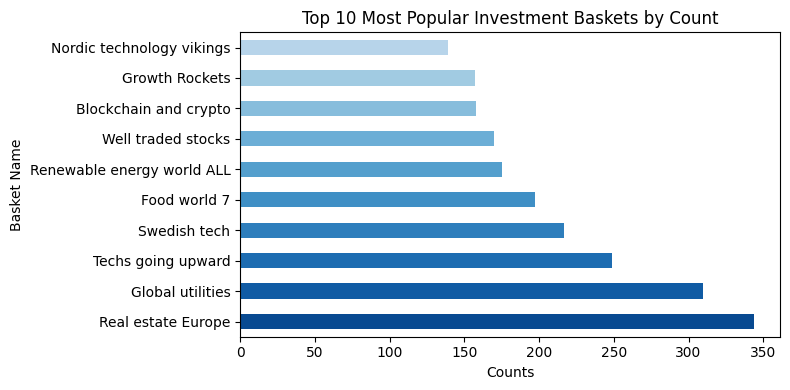


Counts for top 10 baskets:
Real estate Europe: 344
Global utilities: 310
Techs going upward: 249
Swedish tech: 217
Food world 7: 197
Renewable energy world ALL: 175
Well traded stocks: 170
Blockchain and crypto: 158
Growth Rockets: 157
Nordic technology vikings: 139


In [33]:
# Popular investment baskets by name
basket_popularity = invest_df["basket_name"].value_counts()
print("Popular Investment Baskets by Count:")
print(basket_popularity)
print(f"\nTotal unique baskets: {invest_df['basket_name'].nunique()}")

# Plot popular baskets
n_baskets = 10
plt.figure(figsize=(8, 4))
colors = plt.cm.Blues(np.linspace(0.9, 0.3, n_baskets))
basket_popularity.head(n_baskets).plot(kind='barh', color=colors)
plt.title(f'Top {n_baskets} Most Popular Investment Baskets by Count')
plt.xlabel('Counts')
plt.ylabel('Basket Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

print(f"\nCounts for top {n_baskets} baskets:")
for basket, count in basket_popularity.head(n_baskets).items():
    print(f"{basket}: {count:,}")

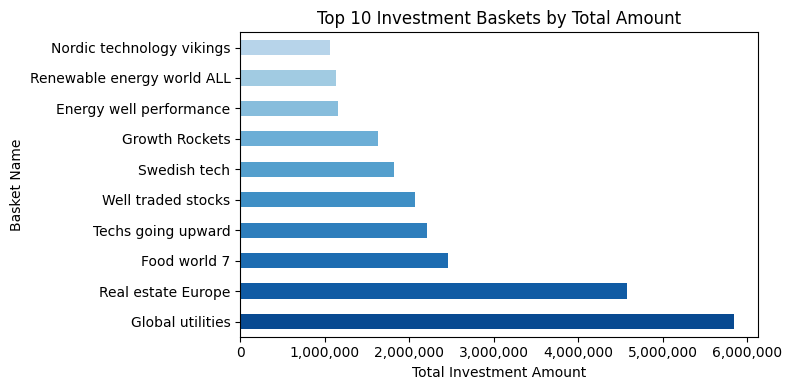


Total amounts for top 10 baskets:
Global utilities: 5,841,110.50
Real estate Europe: 4,582,685.40
Food world 7: 2,461,927.00
Techs going upward: 2,205,728.20
Well traded stocks: 2,074,673.70
Swedish tech: 1,817,397.50
Growth Rockets: 1,627,632.17
Energy well performance: 1,152,285.17
Renewable energy world ALL: 1,135,761.30
Nordic technology vikings: 1,068,362.50


In [11]:
# Investment amounts by basket
basket_amounts = invest_df.groupby('basket_name')['investment_amount'].agg(['count', 'sum', 'mean']).round(2)
basket_amounts.columns = ['Number_of_Investments', 'Total_Amount', 'Average_Amount']
basket_amounts = basket_amounts.sort_values('Total_Amount', ascending=False)

n_baskets = 10
plt.figure(figsize=(8, 4))
colors = plt.cm.Blues(np.linspace(0.9, 0.3, n_baskets))
basket_amounts['Total_Amount'].head(n_baskets).plot(kind='barh', color=colors)
plt.title(f'Top {n_baskets} Investment Baskets by Total Amount')
plt.xlabel('Total Investment Amount')
plt.ylabel('Basket Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

print(f"\nTotal amounts for top {n_baskets} baskets:")
for basket, row in basket_amounts.head(n_baskets).iterrows():
    print(f"{basket}: {row['Total_Amount']:,.2f}")

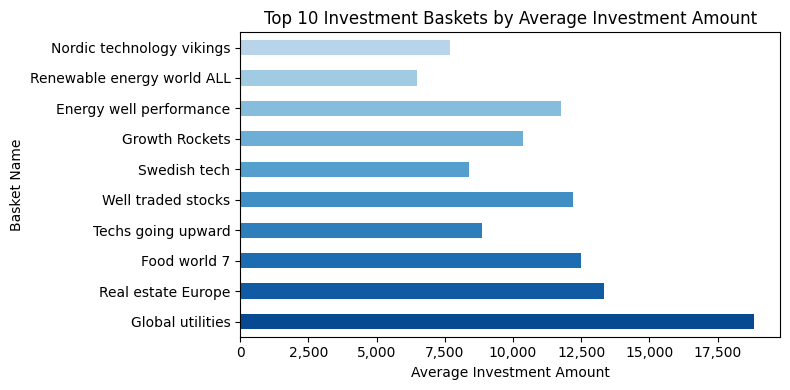


Average amounts for top 10 baskets:
Global utilities: 18,842.29
Real estate Europe: 13,321.76
Food world 7: 12,497.09
Techs going upward: 8,858.35
Well traded stocks: 12,203.96
Swedish tech: 8,375.10
Growth Rockets: 10,367.08
Energy well performance: 11,758.01
Renewable energy world ALL: 6,490.06
Nordic technology vikings: 7,686.06


In [13]:
# Plot top baskets by average amount
n_baskets = 10
plt.figure(figsize=(8, 4))
colors = plt.cm.Blues(np.linspace(0.9, 0.3, n_baskets))
basket_amounts['Average_Amount'].head(n_baskets).plot(kind='barh', color=colors)
plt.title(f'Top {n_baskets} Investment Baskets by Average Investment Amount')
plt.xlabel('Average Investment Amount')
plt.ylabel('Basket Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

print(f"\nAverage amounts for top {n_baskets} baskets:")
for basket, row in basket_amounts.head(n_baskets).iterrows():
    print(f"{basket}: {row['Average_Amount']:,.2f}")


User Investment Statistics:
       Num_Investments  Total_Investment  Avg_Investment  Unique_Baskets
count       994.000000        994.000000      994.000000      994.000000
mean          5.614688      49116.797696     9240.813270        5.613682
std           1.704631      30269.448355     6194.936459        1.702334
min           1.000000       3000.000000     1541.000000        1.000000
25%           4.000000      25487.500000     4803.250000        4.000000
50%           5.000000      42790.000000     7610.000000        5.000000
75%           6.000000      66320.000000    11439.640000        6.000000
max          10.000000     156740.000000    46943.330000       10.000000

Top 10 Most Diversified Users:
         Num_Investments  Total_Investment  Avg_Investment  Unique_Baskets
user_id                                                                   
1432                  10           37830.0          3783.0              10
1760                  10           79620.0          7962.

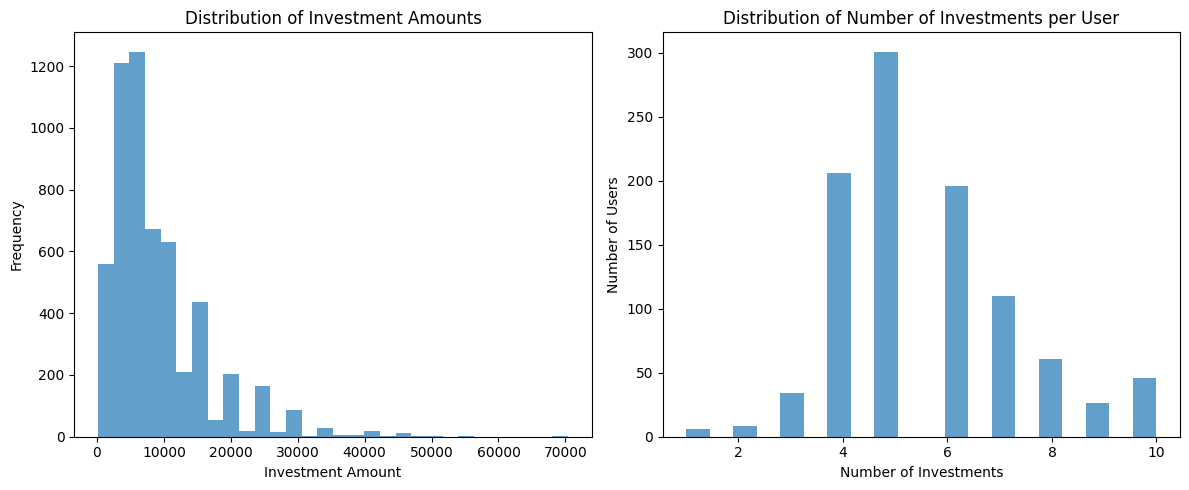

In [26]:
# User investment behavior
user_stats = invest_df.groupby('user_id').agg({
    'investment_amount': ['count', 'sum', 'mean'],
    'basket_name': 'nunique'
}).round(2)
user_stats.columns = ['Num_Investments', 'Total_Investment', 'Avg_Investment', 'Unique_Baskets']

print("\nUser Investment Statistics:")
print(user_stats.describe())

# Most diversified users (investing in most baskets)
print("\nTop 10 Most Diversified Users:")
most_diversified = user_stats.sort_values('Unique_Baskets', ascending=False).head(10)
print(most_diversified)

# Biggest investors by total amount
print("\nTop 10 Biggest Investors by Total Amount:")
biggest_investors = user_stats.sort_values('Total_Investment', ascending=False).head(10)
print(biggest_investors)

# Investment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(invest_df['investment_amount'], bins=30, alpha=0.7)
plt.title('Distribution of Investment Amounts')
plt.xlabel('Investment Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(user_stats['Num_Investments'], bins=20, alpha=0.7)
plt.title('Distribution of Number of Investments per User')
plt.xlabel('Number of Investments')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()


Investment by Category:
                      Num_Investments  Total_Amount  Avg_Amount  \
basket_category                                                   
Consumer Goods                    422    3876952.50     9187.09   
Energy & Utilities                756    9268395.47    12259.78   
Global/International              319    3334649.80    10453.45   
Healthcare                        705    5502907.40     7805.54   
Other                            1350   10194645.74     7551.59   
Real Estate                       344    4582685.40    13321.76   
Regional (Nordic/EU)              384    2611876.00     6801.76   
Technology                       1301    9449984.60     7263.63   

                      Unique_Baskets  
basket_category                       
Consumer Goods                    19  
Energy & Utilities                 8  
Global/International               9  
Healthcare                        16  
Other                             66  
Real Estate                    

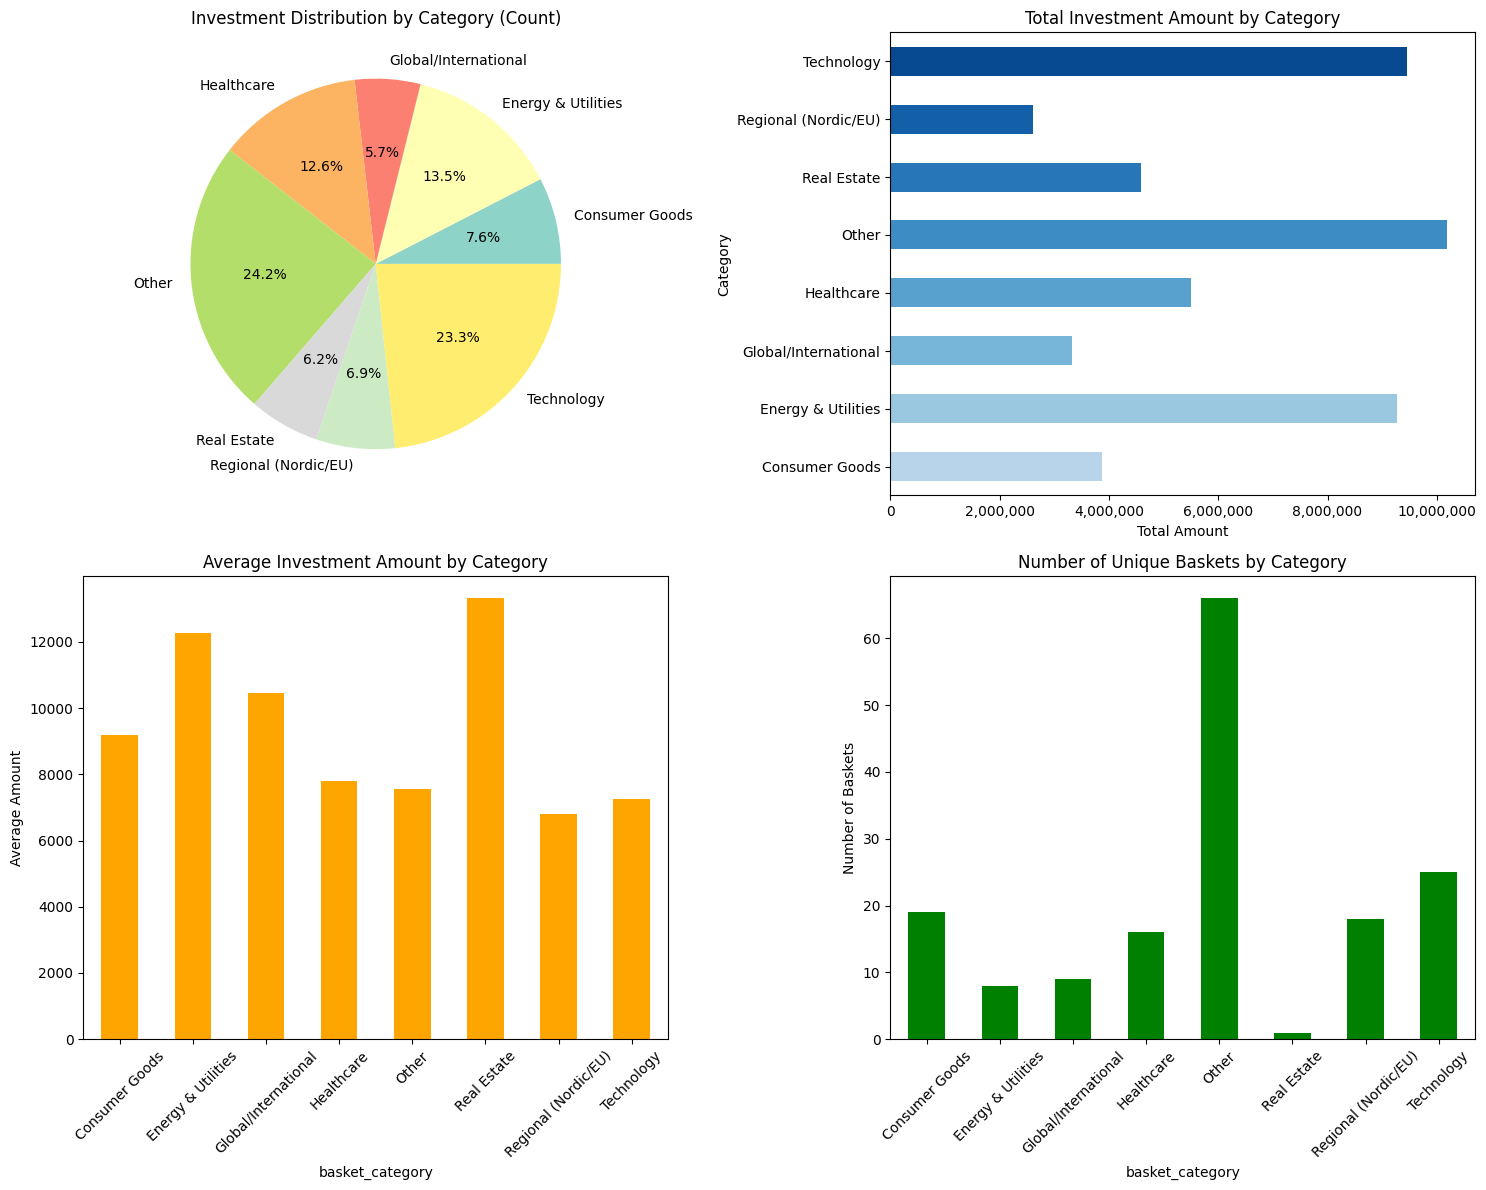


INVESTMENT BASKET ANALYSIS SUMMARY
Total number of investments: 5581
Total number of unique baskets: 162
Total number of users: 994
Total investment amount: 48,822,096.91
Average investment amount: 8,747.91
Most popular basket: Real estate Europe (344 investments)
Highest total amount basket: Global utilities (5,841,110.50)


In [32]:

# Basket categories analysis (group similar baskets)
def categorize_basket(basket_name):
    basket_lower = basket_name.lower()
    if any(word in basket_lower for word in ['tech', 'technology', 'ai', 'digital']):
        return 'Technology'
    elif any(word in basket_lower for word in ['healthcare', 'pharma', 'medical', 'health']):
        return 'Healthcare'
    elif any(word in basket_lower for word in ['real estate', 'property', 'housing']):
        return 'Real Estate'
    elif any(word in basket_lower for word in ['energy', 'utilities', 'oil', 'gas', 'renewable']):
        return 'Energy & Utilities'
    elif any(word in basket_lower for word in ['food', 'consumer', 'retail', 'beer', 'spirits']):
        return 'Consumer Goods'
    elif any(word in basket_lower for word in ['global', 'international', 'world']):
        return 'Global/International'
    elif any(word in basket_lower for word in ['nordic', 'swedish', 'european', 'eu']):
        return 'Regional (Nordic/EU)'
    else:
        return 'Other'

invest_df['basket_category'] = invest_df['basket_name'].apply(categorize_basket)

# Category analysis
category_stats = invest_df.groupby('basket_category').agg({
    'investment_amount': ['count', 'sum', 'mean'],
    'basket_name': 'nunique'
}).round(2)
category_stats.columns = ['Num_Investments', 'Total_Amount', 'Avg_Amount', 'Unique_Baskets']

print("\nInvestment by Category:")
print(category_stats)

# Plot categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Category by count
n_categories = len(category_stats)
colors = plt.cm.Set3(np.linspace(0, 1, n_categories))
category_stats['Num_Investments'].plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', colors=colors)
axes[0,0].set_title('Investment Distribution by Category (Count)')
axes[0,0].set_ylabel('')

# Category by total amount
n_categories = len(category_stats)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_categories))
category_stats['Total_Amount'].plot(kind='barh', ax=axes[0,1], color=colors)
axes[0,1].set_title('Total Investment Amount by Category')
axes[0,1].set_xlabel('Total Amount')
axes[0,1].set_ylabel('Category')
axes[0,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Average investment by category
category_stats['Avg_Amount'].plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Average Investment Amount by Category')
axes[1,0].set_ylabel('Average Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Number of unique baskets by category
category_stats['Unique_Baskets'].plot(kind='bar', ax=axes[1,1], color='green')
axes[1,1].set_title('Number of Unique Baskets by Category')
axes[1,1].set_ylabel('Number of Baskets')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*50)
print("INVESTMENT BASKET ANALYSIS SUMMARY")
print("="*50)
print(f"Total number of investments: {len(invest_df)}")
print(f"Total number of unique baskets: {invest_df['basket_name'].nunique()}")
print(f"Total number of users: {invest_df['user_id'].nunique()}")
print(f"Total investment amount: {invest_df['investment_amount'].sum():,.2f}")
print(f"Average investment amount: {invest_df['investment_amount'].mean():,.2f}")
print(f"Most popular basket: {basket_popularity.index[0]} ({basket_popularity.iloc[0]} investments)")
print(f"Highest total amount basket: {basket_amounts.index[0]} ({basket_amounts.iloc[0]['Total_Amount']:,.2f})")